<a href="https://colab.research.google.com/github/valy8851/Kit/blob/master/colour_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q colour-science
!pip install -q matplotlib
!pip install -q pandas

!mkdir -p /content/downloads

# Uncomment the following lines for the latest develop branch content.
!pip uninstall -y colour-science
!if ! [ -d "colour" ]; then git clone https://github.com/colour-science/colour; fi
!if [ -d "colour" ]; then cd colour && git fetch && git checkout develop && cd ..; fi
import sys
sys.path.append('colour')

    100% |████████████████████████████████| 1.5MB 10.1MB/s 
Uninstalling colour-science-0.3.12:
  Successfully uninstalled colour-science-0.3.12
Cloning into 'colour'...
remote: Enumerating objects: 320, done.
remote: Counting objects: 100% (320/320), done.
remote: Compressing objects: 100% (253/253), done.
remote: Total 35925 (delta 130), reused 164 (delta 66), pack-reused 35605
Receiving objects: 100% (35925/35925), 100.71 MiB | 29.90 MiB/s, done.
Resolving deltas: 100% (27106/27106), done.
Already on 'develop'
Your branch is up to date with 'origin/develop'.


# Colour Tutorial

[Colour](https://github.com/colour-science/Colour/) spreads over
various domains of Colour Science, from colour models to optical
phenomena, this tutorial does not give a complete overview of the
API but is a good introduction to the main concepts.

A directory with examples is available at this path in **Colour** installation: *colour/examples*. It can also be explored directly on [Github](https://github.com/colour-science/colour/tree/master/colour/examples).

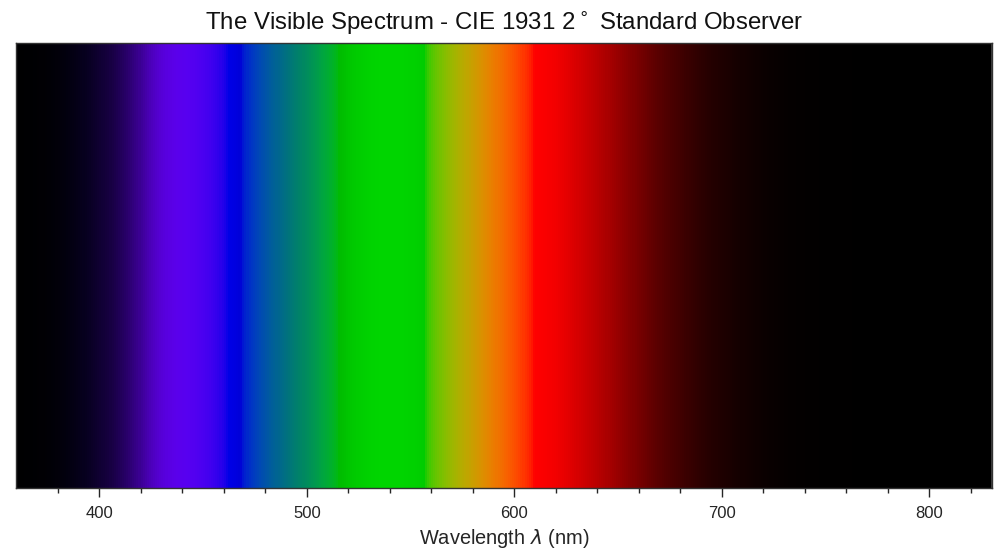

In [0]:
from colour.plotting import *

colour_style()

# Images are not responsive in Google Colab, thus reducing the figure size.
import matplotlib.pyplot as plt

plt.style.use({'figure.figsize': (10.24, 5.76)})

plot_visible_spectrum();

## Introduction

**Colour** is organised around various sub-packages:

-  `colour.adaptation`: Chromatic adaptation models and transformations.
-  `colour.algebra`: Algebra utilities.
-  `colour.appearance`: Colour appearance models.
-  `colour.biochemistry`: Biochemistry computations.
-  `colour.blindness`: Colour vision deficiency models.
-  `colour.continuous`: Base objects for continuous data representation.
-  `colour.contrast`: Objects for contrast sensitivity computation.
-  `colour.characterisation`: Colour fitting and camera characterisation.
-  `colour.colorimetry`: Core objects for colour computations.
-  `colour.constants`: *CIE* and *CODATA* constants.
-  `colour.corresponding`: Corresponding colour chromaticities computations.
-  `colour.difference`: Colour difference computations.
-  `colour.examples`: Examples for the sub-packages.
-  `colour.io`: Input / output objects for reading and writing data.
-  `colour.models`: Colour models.
-  `colour.notation`: Colour notation systems.
-  `colour.phenomena`: Computation of various optical phenomena.
-  `colour.plotting`: Diagrams, figures, etc…
-  `colour.quality`: Colour quality computation.
-  `colour.recovery`: Reflectance recovery.
-  `colour.temperature`: Colour temperature and correlated colour temperature
   computation.
-  `colour.utilities`: Various utilities and data structures.
-  `colour.volume`: Colourspace volumes computation and optimal colour
   stimuli.
   
Most of the public API is available from the root `colour` namespace:

In [0]:
import colour

print(colour.__all__[:5] + ['...'])


['domain_range_scale', 'get_domain_range_scale', 'set_domain_range_scale', 'CHROMATIC_ADAPTATION_METHODS', 'CHROMATIC_ADAPTATION_TRANSFORMS', '...']


Within interactive environments such as Jupyter Notebook or Google Colab, it is recommended to describe the execution environment for reproducibility as follows:

In [0]:
colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 2.7.15rc1 (default, Nov 12 2018, 14:31:15)                   *
*                [GCC 7.3.0]                                                  *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : v0.3.12-11-g0988a2d0                                         *
*                                                                             *
*   Runtime :                                                                 *
*       numpy : 1.14.6                                                        *
*       scipy : 1.1.0                                                         *
*       pandas : 0.22.0                                                       *
*       matplotlib : 2.2.4              

The various sub-packages also expose their public API:

In [0]:
from pprint import pprint

import colour.plotting

for sub_package in ('adaptation', 'algebra', 'appearance', 'biochemistry',
                    'blindness', 'characterisation', 'colorimetry',
                    'constants', 'continuous', 'contrast', 'corresponding',
                    'difference', 'io', 'models', 'notation', 'phenomena',
                    'plotting', 'quality', 'recovery', 'temperature',
                    'utilities', 'volume'):
    print(sub_package.title())
    pprint(getattr(colour, sub_package).__all__[:5] + ['...'])
    print('\n')

Adaptation
['CHROMATIC_ADAPTATION_TRANSFORMS',
 'XYZ_SCALING_CAT',
 'VON_KRIES_CAT',
 'BRADFORD_CAT',
 'SHARP_CAT',
 '...']


Algebra
['cartesian_to_spherical',
 'spherical_to_cartesian',
 'cartesian_to_polar',
 'polar_to_cartesian',
 'cartesian_to_cylindrical',
 '...']


Appearance
['Hunt_InductionFactors',
 'HUNT_VIEWING_CONDITIONS',
 'Hunt_Specification',
 'XYZ_to_Hunt',
 'ATD95_Specification',
 '...']


Biochemistry
['reaction_rate_MichealisMenten',
 'substrate_concentration_MichealisMenten',
 '...']


Blindness
['CVD_MATRICES_MACHADO2010',
 'anomalous_trichromacy_cmfs_Machado2009',
 'anomalous_trichromacy_matrix_Machado2009',
 'cvd_matrix_Machado2009',
 '...']


Characterisation
['RGB_SpectralSensitivities',
 'RGB_DisplayPrimaries',
 'CAMERAS_RGB_SPECTRAL_SENSITIVITIES',
 'COLOURCHECKERS',
 'ColourChecker',
 '...']


Colorimetry
['SpectralShape',
 'DEFAULT_SPECTRAL_SHAPE',
 'SpectralDistribution',
 'MultiSpectralDistribution',
 'sd_blackbody',
 '...']


Constants
['K_M',
 'KP_M',


The codebase is documented and most docstrings have usage examples:

In [0]:
print(colour.temperature.CCT_to_uv_Ohno2013.__doc__)


    Returns the *CIE UCS* colourspace *uv* chromaticity coordinates from given
    correlated colour temperature :math:`T_{cp}`, :math:`\Delta_{uv}` and
    colour matching functions using *Ohno (2013)* method.

    Parameters
    ----------
    CCT : numeric
        Correlated colour temperature :math:`T_{cp}`.
    D_uv : numeric, optional
        :math:`\Delta_{uv}`.
    cmfs : XYZ_ColourMatchingFunctions, optional
        Standard observer colour matching functions.

    Returns
    -------
    ndarray
        *CIE UCS* colourspace *uv* chromaticity coordinates.

    References
    ----------
    :cite:`Ohno2014a`

    Examples
    --------
    >>> from colour import STANDARD_OBSERVERS_CMFS
    >>> cmfs = STANDARD_OBSERVERS_CMFS['CIE 1931 2 Degree Standard Observer']
    >>> CCT = 6507.4342201047066
    >>> D_uv = 0.003223690901513
    >>> CCT_to_uv_Ohno2013(CCT, D_uv, cmfs)  # doctest: +ELLIPSIS
    array([ 0.1977999...,  0.3122004...])
    


At the core of **Colour**  is the `colour.colorimetry` sub-package, it defines the objects needed for spectral computations and many others:

In [0]:
import colour.colorimetry as colorimetry

pprint(colorimetry.__all__)

['SpectralShape',
 'DEFAULT_SPECTRAL_SHAPE',
 'SpectralDistribution',
 'MultiSpectralDistribution',
 'sd_blackbody',
 'blackbody_spectral_radiance',
 'planck_law',
 'LMS_ConeFundamentals',
 'RGB_ColourMatchingFunctions',
 'XYZ_ColourMatchingFunctions',
 'CMFS',
 'LMS_CMFS',
 'RGB_CMFS',
 'STANDARD_OBSERVERS_CMFS',
 'ILLUMINANTS',
 'D_ILLUMINANTS_S_SDS',
 'HUNTERLAB_ILLUMINANTS',
 'ILLUMINANTS_SDS',
 'LIGHT_SOURCES',
 'LIGHT_SOURCES_SDS',
 'LEFS',
 'PHOTOPIC_LEFS',
 'SCOTOPIC_LEFS',
 'sd_constant',
 'sd_zeros',
 'sd_ones',
 'SD_GAUSSIAN_METHODS',
 'sd_gaussian',
 'sd_gaussian_normal',
 'sd_gaussian_fwhm',
 'SD_SINGLE_LED_METHODS',
 'sd_single_led',
 'sd_single_led_Ohno2005',
 'SD_MULTI_LEDS_METHODS',
 'sd_multi_leds',
 'sd_multi_leds_Ohno2005',
 'SD_TO_XYZ_METHODS',
 'MULTI_SD_TO_XYZ_METHODS',
 'sd_to_XYZ',
 'multi_sds_to_XYZ',
 'ASTME30815_PRACTISE_SHAPE',
 'lagrange_coefficients_ASTME202211',
 'tristimulus_weighting_factors_ASTME202211',
 'adjust_tristimulus_weighting_factors_ASTME308

**Colour** computations leverage a comprehensive dataset available in most sub-packages, for example the `colour.colorimetry.dataset`defines the following components:

In [0]:
import colour.colorimetry.dataset as dataset

pprint(dataset.__all__)

['CMFS',
 'LMS_CMFS',
 'RGB_CMFS',
 'STANDARD_OBSERVERS_CMFS',
 'ILLUMINANTS',
 'D_ILLUMINANTS_S_SDS',
 'HUNTERLAB_ILLUMINANTS',
 'ILLUMINANTS_SDS',
 'LIGHT_SOURCES',
 'LIGHT_SOURCES_SDS',
 'LEFS',
 'PHOTOPIC_LEFS',
 'SCOTOPIC_LEFS']


## From Spectral Distribution

Whether it be a sample spectral distribution, colour matching functions or illuminants, spectral data is manipulated using an object built with the `colour.SpectralDistribution` class or based on it:

In [0]:
# Defining a sample spectral distribution data.
sample_sd_data = {
    380: 0.048,
    385: 0.051,
    390: 0.055,
    395: 0.060,
    400: 0.065,
    405: 0.068,
    410: 0.068,
    415: 0.067,
    420: 0.064,
    425: 0.062,
    430: 0.059,
    435: 0.057,
    440: 0.055,
    445: 0.054,
    450: 0.053,
    455: 0.053,
    460: 0.052,
    465: 0.052,
    470: 0.052,
    475: 0.053,
    480: 0.054,
    485: 0.055,
    490: 0.057,
    495: 0.059,
    500: 0.061,
    505: 0.062,
    510: 0.065,
    515: 0.067,
    520: 0.070,
    525: 0.072,
    530: 0.074,
    535: 0.075,
    540: 0.076,
    545: 0.078,
    550: 0.079,
    555: 0.082,
    560: 0.087,
    565: 0.092,
    570: 0.100,
    575: 0.107,
    580: 0.115,
    585: 0.122,
    590: 0.129,
    595: 0.134,
    600: 0.138,
    605: 0.142,
    610: 0.146,
    615: 0.150,
    620: 0.154,
    625: 0.158,
    630: 0.163,
    635: 0.167,
    640: 0.173,
    645: 0.180,
    650: 0.188,
    655: 0.196,
    660: 0.204,
    665: 0.213,
    670: 0.222,
    675: 0.231,
    680: 0.242,
    685: 0.251,
    690: 0.261,
    695: 0.271,
    700: 0.282,
    705: 0.294,
    710: 0.305,
    715: 0.318,
    720: 0.334,
    725: 0.354,
    730: 0.372,
    735: 0.392,
    740: 0.409,
    745: 0.420,
    750: 0.436,
    755: 0.450,
    760: 0.462,
    765: 0.465,
    770: 0.448,
    775: 0.432,
    780: 0.421}

sd = colour.SpectralDistribution(sample_sd_data, name='Sample')
print(repr(sd))


SpectralDistribution([[  3.80000000e+02,   4.80000000e-02],
                      [  3.85000000e+02,   5.10000000e-02],
                      [  3.90000000e+02,   5.50000000e-02],
                      [  3.95000000e+02,   6.00000000e-02],
                      [  4.00000000e+02,   6.50000000e-02],
                      [  4.05000000e+02,   6.80000000e-02],
                      [  4.10000000e+02,   6.80000000e-02],
                      [  4.15000000e+02,   6.70000000e-02],
                      [  4.20000000e+02,   6.40000000e-02],
                      [  4.25000000e+02,   6.20000000e-02],
                      [  4.30000000e+02,   5.90000000e-02],
                      [  4.35000000e+02,   5.70000000e-02],
                      [  4.40000000e+02,   5.50000000e-02],
                      [  4.45000000e+02,   5.40000000e-02],
                      [  4.50000000e+02,   5.30000000e-02],
                      [  4.55000000e+02,   5.30000000e-02],
                      [  4.60000000e+02,

The sample spectral distribution can be easily plotted against the visible spectrum:

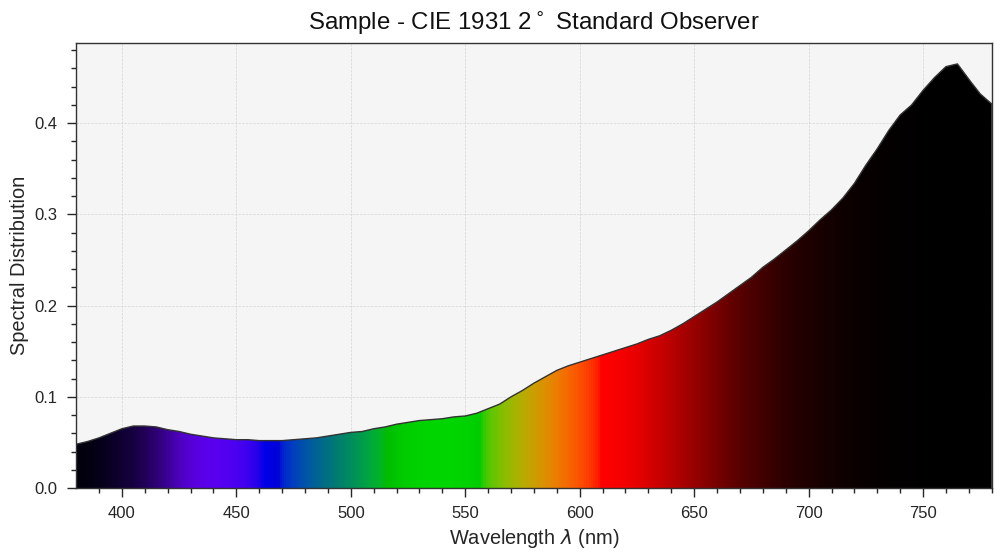

In [0]:
# Plotting the sample spectral distribution.
plot_single_sd(sd);

With the sample spectral distribution defined, its shape is retrieved as follows:

In [0]:
# Displaying the sample spectral distribution shape.
print(sd.shape)

(380.0, 780.0, 5.0)


The returned shape is an instance of the `colour.SpectralShape` class:

In [0]:
repr(sd.shape)

'SpectralShape(380.0, 780.0, 5.0)'

The `colour.SpectralShape` class is used throughout **Colour** to define spectral dimensions and is instantiated as follows:

In [0]:
# Using *colour.SpectralShape* with iteration.
shape = colour.SpectralShape(start=0, end=10, interval=1)
for wavelength in shape:
    print(wavelength)

# *colour.SpectralShape.range* method is providing the complete range of values.
shape = colour.SpectralShape(0, 10, 0.5)
shape.range()

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])

**Colour** defines three convenient objects to create constant spectral distributions:

-  `colour.sd_constant`
-  `colour.sd_zeros`
-  `colour.sd_ones`

In [0]:
# Defining a constant spectral distribution.
sd_constant = colour.sd_constant(100)
print('"Constant Spectral Distribution"')
print(sd_constant.shape)
print(sd_constant[400])

# Defining a zeros filled spectral distribution.
print('\n"Zeros Filled Spectral Distribution"')
sd_zeros = colour.sd_zeros()
print(sd_zeros.shape)
print(sd_zeros[400])

# Defining a ones filled spectral distribution.
print('\n"Ones Filled Spectral Distribution"')
sd_ones = colour.sd_ones()
print(sd_ones.shape)
print(sd_ones[400])

"Constant Spectral Distribution"
(360.0, 780.0, 1.0)
100.0

"Zeros Filled Spectral Distribution"
(360.0, 780.0, 1.0)
0.0

"Ones Filled Spectral Distribution"
(360.0, 780.0, 1.0)
1.0


By default the shape used by `colour.sd_constant`, `colour.sd_zeros` and `colour.sd_ones` is the one defined by the `colour.DEFAULT_SPECTRAL_SHAPE` attribute and based on *ASTM E308-15* practise shape.

In [0]:
print(repr(colour.DEFAULT_SPECTRAL_SHAPE))

SpectralShape(360, 780, 1)


A custom shape can be passed to construct a constant spectral distribution with user defined dimensions:

In [0]:
colour.sd_ones(colour.SpectralShape(400, 700, 5))[450]

1.0

The `colour.SpectralDistribution` class supports the following arithmetical operations:

-  *addition*
-  *subtraction*
-  *multiplication*
-  *division*
-  *exponentiation*

In [0]:
sd1 = colour.sd_ones()
print('"Ones Filled Spectral Distribution"')
print(sd1[400])

print('\n"x2 Constant Multiplied"')
print((sd1 * 2)[400])

print('\n"+ Spectral Distribution"')
print((sd1 + colour.sd_ones())[400])

"Ones Filled Spectral Distribution"
1.0

"x2 Constant Multiplied"
2.0

"+ Spectral Distribution"
2.0


Often interpolation of the spectral distribution is required, this is achieved with the `colour.SpectralDistribution.interpolate` method. Depending on the wavelengths uniformity, the default interpolation method will differ. Following *CIE 167:2005* recommendation: The method developed by *Sprague (1880)* should be used for interpolating functions having a uniformly spaced independent variable and a *Cubic Spline* method for non-uniformly spaced independent variable.

The uniformity of the sample spectral distribution is assessed as follows:

In [0]:
# Checking the sample spectral distribution uniformity.
print(sd.is_uniform())

True


In this case, since the sample spectral distribution is uniform the interpolation defaults to the `colour.SpragueInterpolator` interpolator.

Interpolation happens in place and may alter the original data, use the `colour.SpectralDistribution.copy` method to generate a copy of the spectral distribution before interpolation.

In [0]:
# Copying the sample spectral distribution.
sd_copy = sd.copy()

# Interpolating the copied sample spectral distribution.
sd_copy.interpolate(colour.SpectralShape(400, 770, 1))
sd_copy[401]

0.065809599999999996

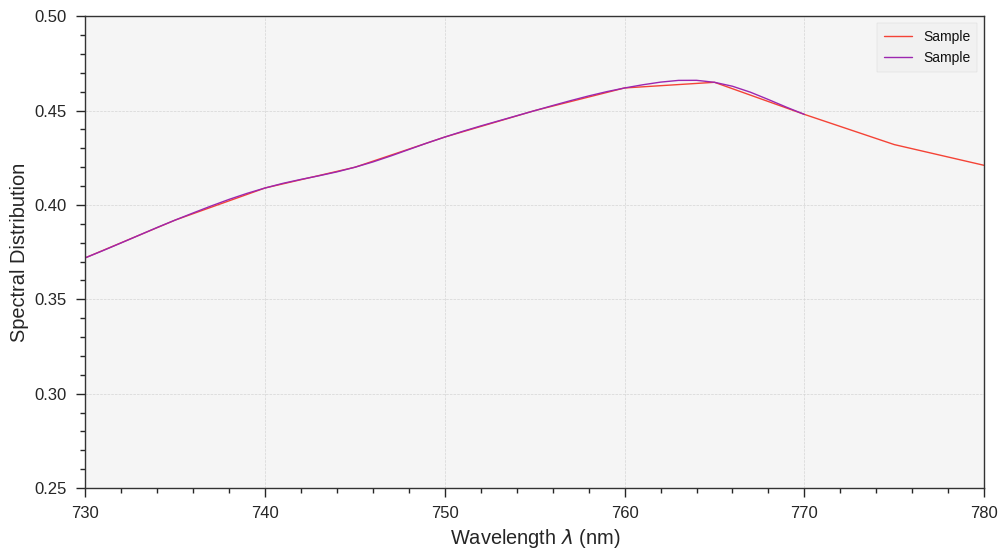

In [0]:
# Comparing the interpolated spectral distribution with the original one.
plot_multi_sds([sd, sd_copy], bounding_box=[730,780, 0.25, 0.5]);

Extrapolation although dangerous can be used to help aligning two spectral distributions together. *CIE publication CIE 15:2004 “Colorimetry”* recommends that unmeasured values may be set equal to the nearest measured value of the appropriate quantity in truncation:

In [0]:
# Extrapolating the copied sample spectral distribution.
sd_copy.extrapolate(colour.SpectralShape(340, 830))
sd_copy[340], sd_copy[830]

(0.064999999999999947, 0.44800000000000018)

The underlying interpolator can be swapped for any of the **Colour** interpolators:

In [0]:
pprint([
    export for export in colour.algebra.interpolation.__all__
    if 'Interpolator' in export
])

[u'KernelInterpolator',
 u'NearestNeighbourInterpolator',
 u'LinearInterpolator',
 u'SpragueInterpolator',
 u'CubicSplineInterpolator',
 u'PchipInterpolator',
 u'NullInterpolator']


In [0]:
# Changing interpolator while trimming the copied spectral distribution.
sd_copy.interpolate(
    colour.SpectralShape(400, 700, 10), interpolator=colour.LinearInterpolator)


SpectralDistribution([[  4.00000000e+02,   6.50000000e-02],
                      [  4.10000000e+02,   6.80000000e-02],
                      [  4.20000000e+02,   6.40000000e-02],
                      [  4.30000000e+02,   5.90000000e-02],
                      [  4.40000000e+02,   5.50000000e-02],
                      [  4.50000000e+02,   5.30000000e-02],
                      [  4.60000000e+02,   5.20000000e-02],
                      [  4.70000000e+02,   5.20000000e-02],
                      [  4.80000000e+02,   5.40000000e-02],
                      [  4.90000000e+02,   5.70000000e-02],
                      [  5.00000000e+02,   6.10000000e-02],
                      [  5.10000000e+02,   6.50000000e-02],
                      [  5.20000000e+02,   7.00000000e-02],
                      [  5.30000000e+02,   7.40000000e-02],
                      [  5.40000000e+02,   7.60000000e-02],
                      [  5.50000000e+02,   7.90000000e-02],
                      [  5.60000000e+02,

The extrapolation behaviour can be changed for `Linear` method instead of the `Constant` default method or even use arbitrary constant `left` and `right` values:

In [0]:
# Extrapolating the copied sample spectral distribution with *Linear* method.
sd_copy.extrapolate(
    colour.SpectralShape(340, 830),
    extrapolator_args={'method': 'Linear',
                       'right': 0})
sd_copy[340], sd_copy[830]

(0.046999999999999341, 0.0)

Aligning a spectral distribution is a convenient way to first interpolates the current data within its original bounds, then, if required, extrapolate any missing values to match the requested shape:

In [0]:
# Aligning the cloned sample spectral distribution.
# The spectral distribution is first trimmed as above.
sd_copy.interpolate(colour.SpectralShape(400, 700))
sd_copy.align(colour.SpectralShape(340, 830, 5))
sd_copy[340], sd_copy[830]

(0.064999999999999974, 0.28199999999999986)

The `colour.SpectralDistribution` class also supports various arithmetic operations like *addition*, *subtraction*, *multiplication*, *division* or *exponentiation* with *numeric* and *array_like* variables or other `colour.SpectralDistribution` class instances:

In [0]:
sd = colour.SpectralDistribution({
    410: 0.25,
    420: 0.50,
    430: 0.75,
    440: 1.0,
    450: 0.75,
    460: 0.50,
    480: 0.25
})

print((sd.copy() + 1).values)
print((sd.copy() * 2).values)
print((sd * [0.35, 1.55, 0.75, 2.55, 0.95, 0.65, 0.15]).values)
print((sd * colour.sd_constant(2, sd.shape) * colour.sd_constant(3, sd.shape)).values)


[ 1.25  1.5   1.75  2.    1.75  1.5   1.25]
[ 0.5  1.   1.5  2.   1.5  1.   0.5]
[ 0.0875  0.775   0.5625  2.55    0.7125  0.325   0.0375]
[ 1.5  3.   4.5  6.   4.5  3.   nan  1.5]


The spectral distribution can be normalised with an arbitrary factor:

In [0]:
print(sd.normalise().values)
print(sd.normalise(100).values)

[ 0.25  0.5   0.75  1.    0.75  0.5   0.25]
[  25.   50.   75.  100.   75.   50.   25.]


A the heart of the `colour.SpectralDistribution` class is the `colour.continuous.Signal` class which implements the `colour.continuous.Signal.function` method.

Evaluating the function for any independent domain $x \in \mathbb{R}$ variable returns a corresponding range $y \in \mathbb{R}$ variable.

It adopts an interpolating function encapsulated inside an extrapolating function. The resulting function independent domain, stored as discrete values in the `colour.continuous.Signal.domain` attribute corresponds with the function dependent and already known range stored in the `colour.continuous.Signal.range` attribute.

Describing the `colour.continuous.Signal` class is beyond the scope of this tutorial but the core capability can be described.

In [0]:
import numpy as np

range_ = np.linspace(10, 100, 10)
signal = colour.continuous.Signal(range_)
print(repr(signal))

Signal([[   0.,   10.],
        [   1.,   20.],
        [   2.,   30.],
        [   3.,   40.],
        [   4.,   50.],
        [   5.,   60.],
        [   6.,   70.],
        [   7.,   80.],
        [   8.,   90.],
        [   9.,  100.]],
       interpolator=KernelInterpolator,
       interpolator_args={},
       extrapolator=Extrapolator,
       extrapolator_args={u'right': nan, u'method': u'Constant', u'left': nan})


In [0]:
# Returning the corresponding range *y* variable for any arbitrary independent domain *x* variable.
signal[np.random.uniform(0, 9, 10)]

array([ 99.83730847,  30.87129675,  61.46481556,  38.2779576 ,
        10.31809213,  61.8158794 ,  88.43779459,  22.68883077,
        12.76521805,  39.98989457])

## Convert to Tristimulus Values

From a given spectral distribution, *CIE XYZ* tristimulus values can be calculated:

In [0]:
sd = colour.SpectralDistribution(sample_sd_data)
cmfs = colour.STANDARD_OBSERVERS_CMFS['CIE 1931 2 Degree Standard Observer']
illuminant = colour.ILLUMINANTS_SDS['D65']

# Calculating the sample spectral distribution *CIE XYZ* tristimulus values.
XYZ = colour.sd_to_XYZ(sd, cmfs, illuminant)
print(XYZ)

[ 10.97085572   9.70278591   6.05562778]


## From *CIE XYZ* Colourspace

*CIE XYZ* is the central colourspace for Colour Science from which many computations are available, expanding to even more computations:

In [0]:
# Displaying objects interacting directly with the *CIE XYZ* colourspace.
pprint([name for name in colour.__all__ if name.startswith('XYZ_to')])


['XYZ_to_ATD95',
 'XYZ_to_CAM16',
 'XYZ_to_CIECAM02',
 'XYZ_to_Hunt',
 'XYZ_to_LLAB',
 'XYZ_to_Nayatani95',
 'XYZ_to_RLAB',
 'XYZ_to_Hunter_Lab',
 'XYZ_to_Hunter_Rdab',
 'XYZ_to_IPT',
 'XYZ_to_JzAzBz',
 'XYZ_to_K_ab_HunterLab1966',
 'XYZ_to_Lab',
 'XYZ_to_Luv',
 'XYZ_to_OSA_UCS',
 'XYZ_to_RGB',
 'XYZ_to_UCS',
 'XYZ_to_UVW',
 'XYZ_to_hdr_CIELab',
 'XYZ_to_hdr_IPT',
 'XYZ_to_sRGB',
 'XYZ_to_xy',
 'XYZ_to_xyY',
 'XYZ_to_sd']


## Convert to Display Colours

*CIE XYZ* tristimulus values can be converted into *sRGB* colourspace *RGB* values in order to display them on screen:

In [0]:
# The output domain of *colour.sd_to_XYZ* is [0, 100] and the input
# domain of *colour.XYZ_to_sRGB* is [0, 1]. It needs to be accounted for,
# thus the input *CIE XYZ* tristimulus values are scaled.
RGB = colour.XYZ_to_sRGB(XYZ / 100)
print(RGB)

[ 0.45675795  0.30986982  0.24861924]


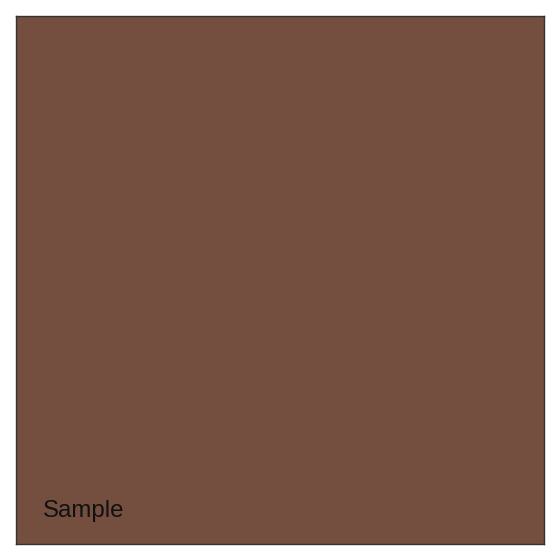

In [0]:
# Plotting the *sRGB* colourspace colour of the *Sample* spectral distribution.
plot_single_colour_swatch(
    ColourSwatch('Sample', RGB),
    text_parameters={'size': 'x-large'});

## Generate Colour Rendition Charts

Likewise, colour values from a colour rendition chart sample can be computed.

This is useful for render time checks in the VFX industry, where a synthetic colour chart can be inserted into a render to ensure the colour management is acting as expected.


The `colour.characterisation` sub-package contains the dataset for various colour rendition charts:

In [0]:
# Colour rendition charts chromaticity coordinates.
print(sorted(colour.characterisation.COLOURCHECKERS.keys()))

# Colour rendition charts spectral distributions.
print(sorted(colour.characterisation.COLOURCHECKERS_SDS.keys()))

[u'BabelColor Average', u'ColorChecker 1976', u'ColorChecker 2005', u'ColorChecker24 - After November 2014', u'ColorChecker24 - Before November 2014', u'babel_average', u'cc2005', u'cca2014', u'ccb2014']
[u'BabelColor Average', u'ColorChecker N Ohta', u'babel_average', u'cc_ohta']


The above `cc2005`, `babel_average` and `cc_ohta` keys are convenient aliases for respectively `ColorChecker 2005`, `BabelColor Average` and `ColorChecker N Ohta` keys.

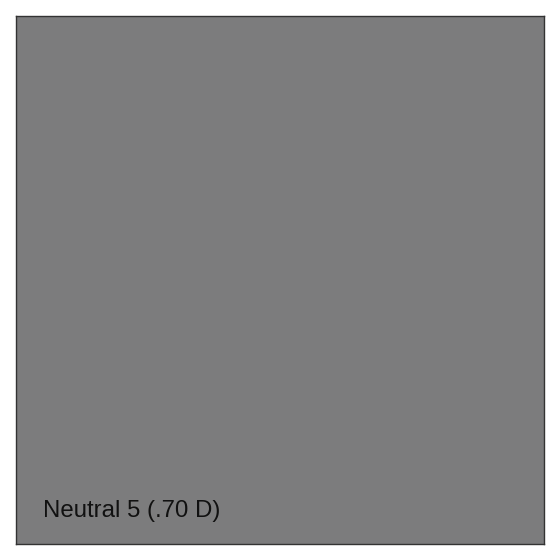

In [0]:
# Plotting the *sRGB* colourspace colour of *neutral 5 (.70 D)* patch.
patch_name = 'neutral 5 (.70 D)'
patch_sd = colour.COLOURCHECKERS_SDS['ColorChecker N Ohta'][patch_name]
XYZ = colour.sd_to_XYZ(patch_sd, cmfs, illuminant)
RGB = colour.XYZ_to_sRGB(XYZ / 100)

plot_single_colour_swatch(
    ColourSwatch(patch_name.title(), RGB),
    text_parameters={'size': 'x-large'});

**Colour** defines a convenient plotting object to draw synthetic colour rendition charts figures:

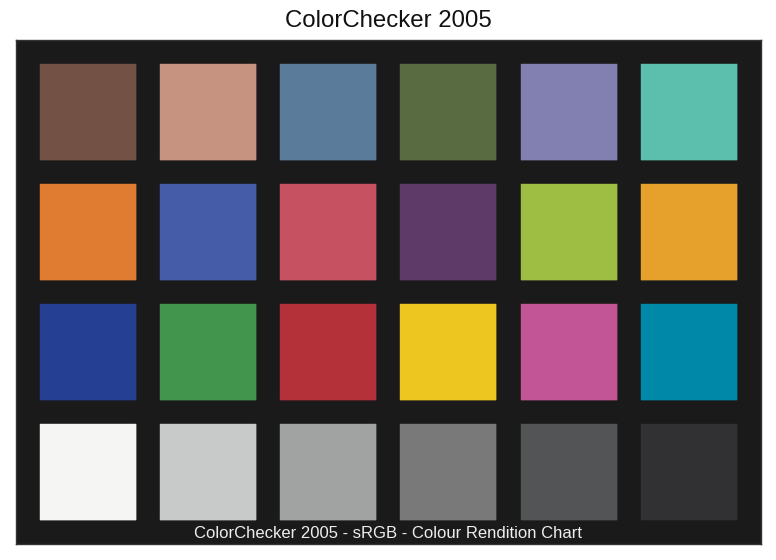

In [0]:
plot_single_colour_checker(
    colour_checker='ColorChecker 2005', text_parameters={'visible': False});

## Convert to Chromaticity Coordinates

Given a spectral distribution, chromaticity coordinates *xy* can be computed using the `colour.XYZ_to_xy` definition:

In [0]:
# Computing *xy* chromaticity coordinates for the *neutral 5 (.70 D)* patch.
xy =  colour.XYZ_to_xy(XYZ)
print(xy)

[ 0.31259787  0.32870029]


Chromaticity coordinates *xy* can be plotted into the *CIE 1931 Chromaticity Diagram*:

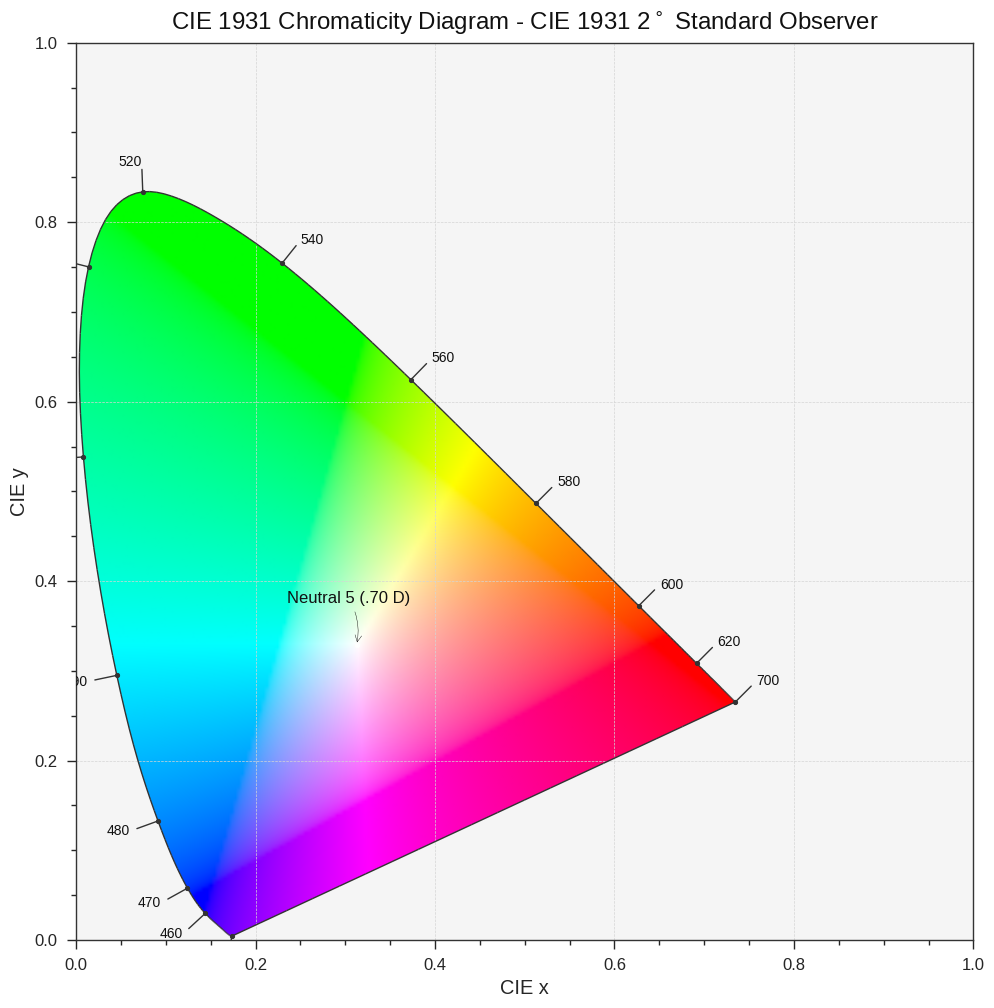

In [0]:
import matplotlib.pyplot as plt

# Plotting the *CIE 1931 Chromaticity Diagram*.
# The argument *standalone=False* is passed so that the plot doesn't get
# displayed and can be used as a basis for other plots.
plot_chromaticity_diagram_CIE1931(standalone=False)

# Plotting the *xy* chromaticity coordinates.
x, y = xy
plt.plot(x, y, 'o-', color='white')

# Annotating the plot.
plt.annotate(patch_sd.name.title(),
             xy=xy,
             xytext=(-50, 30),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=-0.2'))

# Displaying the plot.
render(
    standalone=True,
    limits=(-0.1, 0.9, -0.1, 0.9),
    x_tighten=True,
    y_tighten=True);

# And More...

## The Cosmic Spectrum and the Colour of the Universe

This section reproduces the results from [Karl Glazebrook & Ivan Baldry](http://www.astro.ljmu.ac.uk/~ikb/Cosmic-Spectrum.html) where they computed the colour of the Universe with the [2dF Galaxy Redshift Survey](http://magnum.anu.edu.au/~TDFgg/) data.

In [0]:
!curl http://www.astro.ljmu.ac.uk/~ikb/Cosmic_Spectrum_files/spectrum-Z-0.06e.txt --output /content/downloads/spectrum-Z-0.06e.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28090  100 28090    0     0  30074      0 --:--:-- --:--:-- --:--:-- 30042


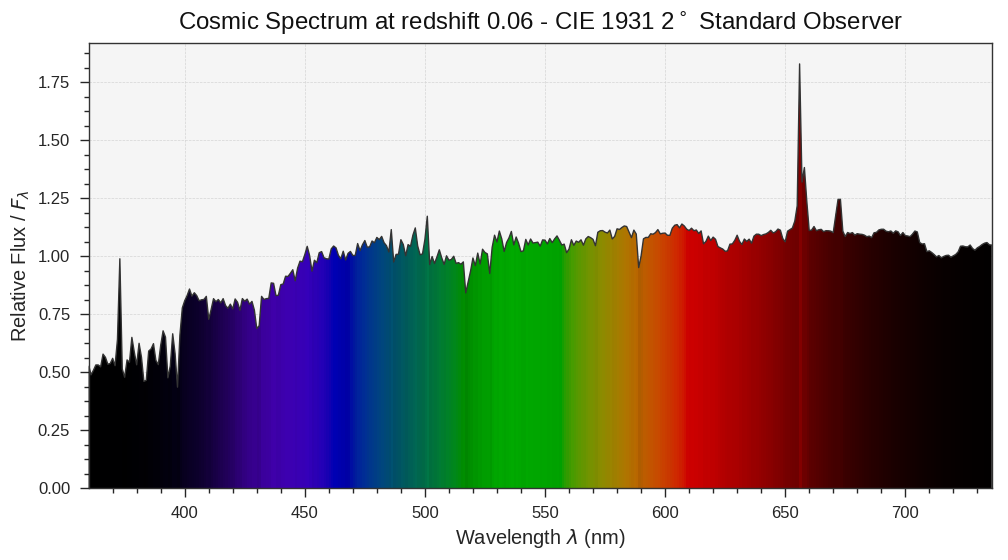

In [0]:
def read_cosmic_spectrum(path='/content/downloads/spectrum-Z-0.06e.txt'):    
    data = {}
    with open(path) as file:
        for line in file:
            if line.startswith('#'):
                continue

            wavelength, value = line.strip().split()
            # Current data is in angstrom and need to be converted to 
            # nanometers.
            data[float(wavelength) / 10] = float(value)
    
    return colour.SpectralDistribution(
        data, name='Cosmic Spectrum at redshift 0.06')


cosmic_spectrum = read_cosmic_spectrum()

plot_single_sd(
    cosmic_spectrum,
    modulate_colours_with_sd_amplitude=True,
    y_label='Relative Flux / $F_\\lambda$');


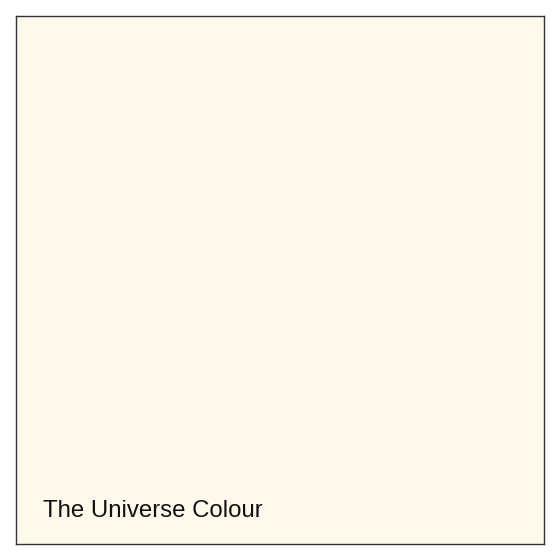

In [0]:
with colour.utilities.domain_range_scale('1'):
    XYZ = colour.sd_to_XYZ(cosmic_spectrum.align(colour.DEFAULT_SPECTRAL_SHAPE))
    RGB = colour.XYZ_to_sRGB(
        XYZ, illuminant=colour.ILLUMINANTS['cie_2_1931']['E'])

plot_single_colour_swatch(
    ColourSwatch(
        'The Universe Colour', colour.utilities.normalise_maximum(RGB)),
    text_parameters={'size': 'x-large'});


## The Sun - Blackbody 5778K

This section shows how The Sun is close to a blackbody with temperature equal to 5778K. The ASTM G-173 Solar Spectral Irradiance data is available for download on the [NREL website](https://www.nrel.gov/grid/solar-resource/spectra.html).

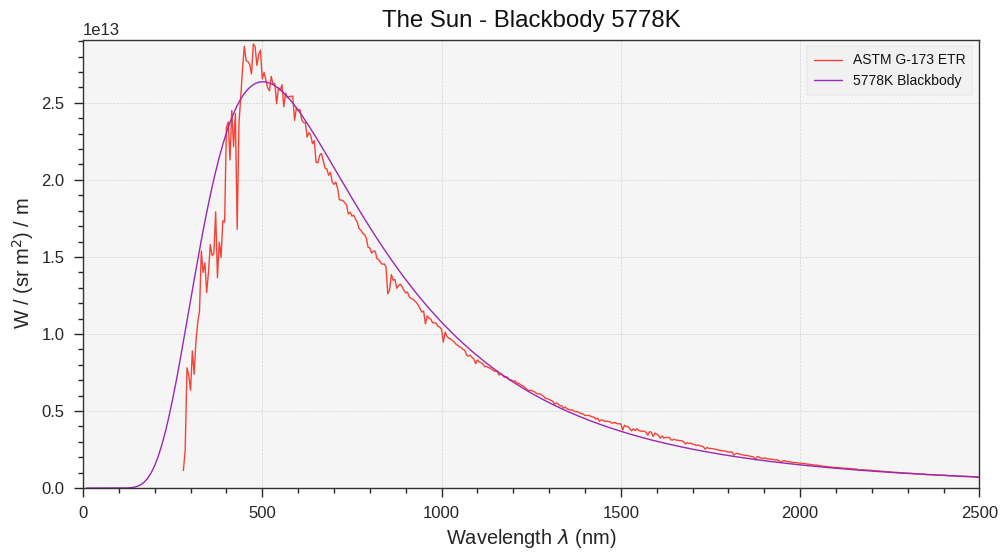

In [0]:
from scipy.signal import savgol_filter

blackbody_sd = colour.sd_blackbody(5778, colour.SpectralShape(10, 10000, 10))

ASTM_G_173_sd = colour.plotting.ASTM_G_173_ETR.copy()

ASTM_G_173_sd.interpolate(
    colour.SpectralShape(interval=5), interpolator=colour.LinearInterpolator)

ASTM_G_173_sd /= np.max(savgol_filter(ASTM_G_173_sd.values, 101, 3))
ASTM_G_173_sd *= np.max(np.nan_to_num(blackbody_sd.values))

T_M = max(ASTM_G_173_sd.values)

plot_multi_sds(
    [ASTM_G_173_sd, blackbody_sd], **{
        'bounding_box': [0, 2500, 0, T_M + 0.01 * T_M],
        'title': 'The Sun - Blackbody 5778K',
        'y_label': 'W / (sr m$^2$) / m',
    });


## Interaction with Colour - Analysis - Three.js

An interactive viewer based on **Colour** and [Three.js](https://github.com/mrdoob/three.js/), the repository is available on [Github](https://github.com/colour-science/colour-analysis-three.js).

In [0]:
from IPython.display import HTML

PRIMARIES_HTML = """
<div id='gamutView' style='width:1280px;height:720px'></div>

<script src="https://cdn.rawgit.com/mrdoob/three.js/master/build/three.min.js"></script>
<script src="https://cdn.rawgit.com/mrdoob/three.js/master/examples/js/controls/OrbitControls.js"></script>
<script src="https://cdn.rawgit.com/mrdoob/three.js/master/examples/js/controls/TrackballControls.js"></script>
<script src="https://cdn.rawgit.com/dataarts/dat.gui/v0.6.5/build/dat.gui.min.js"></script>
<script src="https://rawgit.com/colour-science/colour-analysis-three.js/master/dist/colour-analysis.js"></script>
<script type="text/javascript">
    window.colourAnalysisServer = 'https://www.colour-science.org:8020';

    var gamutViewSettings = {
            scene: {
                background: '#F5F5F5'
            },
            fog: {
                color: '#F5F5F5',
            },
            grid: {
                colorCenterLine: '#B5B5B5',
                colorGrid: '#D5D5D5'
            },
            camera: {
                fov: 27.5,
                position: { x: -2, y: 2, z: 1 },
            },
    }

    var primaryColourspace = 'sRGB';
    var colourspaceModel = 'CIE xyY';

    var gamutView = new ColourAnalysis.GamutView(
        document.getElementById('gamutView'),
        {
            ...{
                primaryColourspace: primaryColourspace,
                colourspaceModel: colourspaceModel,
            },
            ...gamutViewSettings
        }
    );
    gamutView.addViewAxesVisual();
    gamutView.addSpectralLocusVisual();
    gamutView.addPrimaryColourspaceVisual(
        {
            uniformOpacity: 0.85
        }
    );
    gamutView.animate();

    class Controls {
        constructor() {
            this.captureGamutView = function () {
                var capture = gamutView.capture();
                ColourAnalysis.saveFile(
                    capture.replace(
                        'image/png', 'image/octet-stream'
                    ),
                    'Colour-Analysis-GamutView.png'
                );
            };
        }
    }

    var controls = new Controls();

    var gui = new dat.GUI();
    gui.add(controls, 'captureGamutView')
       .name('Capture Gamut View');
</script>
"""

HTML(PRIMARIES_HTML)